In [1]:
import numpy as np
#from scipy import optimize
#import numpy_financial as npf
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def getDateTime():
    start_time = datetime.today()
    start_date = start_time.strftime("%m/%Y")

    end_time = start_time + relativedelta(months=360)
    end_date = end_time.strftime("%m/%Y")
    return start_date,end_date

start_date,end_date = getDateTime()
print("Today's Date: ", start_date)
print("End of Study Date: ", end_date)

Today's Date:  01/2025
End of Study Date:  01/2055


## Purchase Assumptions:
Input variables for house purchase assumptions. The variables **purchase_price** and **hold_period** are mandatory inputs...

In [1]:
pa_params = {
    "purchase_price": 500000,
    "hold_period": 5
}

class PurchaseAssumptions:
    def __init__(self,purchase_price,hold_period):
        self.purchase_price = purchase_price
        self.hold_period = hold_period
        self.hold_period_m = self.hold_period * 12

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

PA = PurchaseAssumptions(**pa_params)
PA.__str__()

purchase_price: 500000
hold_period: 5
hold_period_m: 60


## Rent Assumptions:
Input variables for renting assumptions. The variables **apartment_rent**, **parking_rent** and **renters_insurance** are mandatory, toggle buttons on optional inclusions...

In [4]:
ra_params = {
    "apartment_rent": 3000,
    "parking_rent": 300,
    "renters_insurance": 600,
}

class RentAssumptions:
    def __init__(self,apartment_rent,parking_rent,renters_insurance):
        self.apartment_rent = apartment_rent
        self.parking_rent = parking_rent
        self.renters_insurance = renters_insurance
        self.monthly_rent = self.apartment_rent + self.parking_rent

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

RA = RentAssumptions(**ra_params)
RA.__str__()

print(f"\nMonthly Rent: ${RA.monthly_rent}/month\nRenters Insurance: ${RA.renters_insurance}/year")

apartment_rent: 3000
parking_rent: 300
renters_insurance: 600
monthly_rent: 3300

Monthly Rent: $3300/month
Renters Insurance: $600/year


## General Assumptions:
Input variables for general assumptions, whose appearance can be toggled on/off...most all these should be general assumptions...

In [5]:
ga_params = {
    "rate_capital_gains": 20,
    "rate_federal_tax": 35,
    "bool_federal": True,
    "salt_limit": 10000,
    "bool_salt": True,
    "rent_growth": 3,
    "home_appreciation": 3,
    "ret_inflation": 3,
    "other_inflation": 3
}

class GeneralAssumptions:
    def __init__(self,rate_capital_gains,rate_federal_tax,bool_federal,salt_limit,bool_salt,rent_growth,home_appreciation,ret_inflation,other_inflation):
        self.rate_capital_gains = rate_capital_gains
        self.rate_federal_tax = rate_federal_tax
        self.bool_federal = bool_federal
        self.salt_limit = salt_limit
        self.bool_salt = bool_salt
        self.rent_growth = rent_growth
        self.home_appreciation = home_appreciation
        self.ret_inflation = ret_inflation
        self.other_inflation = other_inflation

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

GA = GeneralAssumptions(**ga_params)
GA.__str__()

rate_capital_gains: 20
rate_federal_tax: 35
bool_federal: True
salt_limit: 10000
bool_salt: True
rent_growth: 3
home_appreciation: 3
ret_inflation: 3
other_inflation: 3


## Acquisition Costs:
Input variables for acquisition related expenses, whose appearance can be toggled on/off...most all these should be general assumptions...

In [6]:
ac_params = {
    "purchase_assumptions": PA,
    "fee_inspection": 1000,
    "fee_appraisal": 750,
    "fee_legal": 1500,
    "rate_title_insurance_aq": 0.5,
    "lender_costs_other": 2000,
    "rate_transfer_tax_aq": 0
}

class AcquisitionCosts:
    def __init__(self,purchase_assumptions,fee_inspection,fee_appraisal,fee_legal,rate_title_insurance_aq,lender_costs_other,rate_transfer_tax_aq):
        self.fee_inspection = fee_inspection
        self.fee_appraisal = fee_appraisal
        self.fee_legal = fee_legal
        self.rate_title_insurance_aq = rate_title_insurance_aq
        self.title_insurance_aq = (rate_title_insurance_aq/100) * purchase_assumptions.purchase_price
        self.lender_costs_other = lender_costs_other
        self.rate_transfer_tax_aq = rate_transfer_tax_aq
        self.transfer_tax_aq = (rate_transfer_tax_aq/100) * purchase_assumptions.purchase_price
        self.total_acquisition = fee_inspection + fee_appraisal + fee_legal + self.title_insurance_aq + lender_costs_other + self.transfer_tax_aq

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

AC = AcquisitionCosts(**ac_params)
AC.__str__()

print(f"\nTitle Insurance: ${AC.title_insurance_aq}\nTransfer Tax: ${AC.transfer_tax_aq}\nTotal Acquisition: ${AC.total_acquisition}")

fee_inspection: 1000
fee_appraisal: 750
fee_legal: 1500
rate_title_insurance_aq: 0.5
title_insurance_aq: 2500.0
lender_costs_other: 2000
rate_transfer_tax_aq: 0
transfer_tax_aq: 0.0
total_acquisition: 7750.0

Title Insurance: $2500.0
Transfer Tax: $0.0
Total Acquisition: $7750.0


## Disposition Costs:
Input variables for disposition related expenses, whose appearance can be toggled on/off...most all these should be general assumptions...

In [7]:
dc_params = {
    "gross_sale_30y": PA.purchase_price * (1 + ((GA.home_appreciation+GA.ret_inflation+GA.other_inflation)/100) ),
    "rate_title_insurance_dis": 0,
    "rate_transfer_tax_dis": 0,
    "rate_brokerage": 5.5,
}

class DispositionCosts:
    def __init__(self,gross_sale_30y,rate_title_insurance_dis,rate_transfer_tax_dis,rate_brokerage):
        self.rate_title_insurance_dis = rate_title_insurance_dis
        self.title_insurance_dis = (rate_title_insurance_dis/100) * gross_sale_30y
        self.rate_transfer_tax_dis = rate_transfer_tax_dis
        self.transfer_tax_dis = (rate_transfer_tax_dis/100) * gross_sale_30y
        self.rate_brokerage = rate_brokerage
        self.fee_brokerage = (rate_brokerage/100) * gross_sale_30y
        self.total_disposition = self.title_insurance_dis + self.transfer_tax_dis + self.fee_brokerage

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

DC = DispositionCosts(**dc_params)
DC.__str__()

rate_title_insurance_dis: 0
title_insurance_dis: 0.0
rate_transfer_tax_dis: 0
transfer_tax_dis: 0.0
rate_brokerage: 5.5
fee_brokerage: 29975.0
total_disposition: 29975.0


## Operating Costs:
Input variables for home operation/maintenance expenses, whose appearance can be toggled on/off...most all these should be general assumptions...

In [8]:
oc_params = {
    "purchase_assumptions": PA,
    "rate_property_tax": 0.6,
    "rate_home_insurance": 0.6,
    "rate_home_maintenance": 1,
    "rate_hoa_util": 0.25
}

class OperatingCosts:
    def __init__(self,purchase_assumptions,rate_property_tax,rate_home_insurance,rate_home_maintenance,rate_hoa_util):
        self.rate_property_tax = rate_property_tax
        self.property_tax = (rate_property_tax/100) * purchase_assumptions.purchase_price
        self.rate_home_insurance = rate_home_insurance
        self.home_insurance = (rate_home_insurance/100) * purchase_assumptions.purchase_price
        self.rate_home_maintenance = rate_home_maintenance
        self.home_maintenance = (rate_home_maintenance/100) * purchase_assumptions.purchase_price
        self.rate_hoa_util = rate_hoa_util
        self.hoa_util = ((rate_hoa_util/100) * purchase_assumptions.purchase_price)/12

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

OC = OperatingCosts(**oc_params)
OC.__str__()

rate_property_tax: 0.6
property_tax: 3000.0
rate_home_insurance: 0.6
home_insurance: 3000.0
rate_home_maintenance: 1
home_maintenance: 5000.0
rate_hoa_util: 0.25
hoa_util: 104.16666666666667


# Loan Assumptions:

In [9]:
la_params = {
    "purchase_assumptions": PA,
    "rate_ltv_max": 80,
    "loan_ltv_max": 787750,
    "rate_home_loan": 7,
    "amort_home_loan": 30,
    "rate_mortgage_insurance": 5,
    "clear_mortgage_insurance": 80,
    "rate_mortgage_points": 1
}

class LoanAssumptions:
    def __init__(self,purchase_assumptions,rate_ltv_max,loan_ltv_max,rate_home_loan,amort_home_loan,rate_mortgage_insurance,clear_mortgage_insurance,rate_mortgage_points):
        self.rate_ltv_max = rate_ltv_max
        self.loan_ltv_max = loan_ltv_max
        self.loan_ltv_desired = min(purchase_assumptions.purchase_price*(rate_ltv_max/100), loan_ltv_max)
        self.rate_ltv_desired = (self.loan_ltv_desired/purchase_assumptions.purchase_price)*100
        self.rate_home_loan = rate_home_loan
        self.amort_home_loan = amort_home_loan
        self.rate_mortgage_insurance = rate_mortgage_insurance
        self.clear_mortgage_insurance = clear_mortgage_insurance
        self.rate_mortgage_points = rate_mortgage_points
        self.mortgage_points = (rate_mortgage_points/100) * self.loan_ltv_desired

    def __str__(self):
        for key,value in vars(self).items():
            print(f"{key}: {value}")

LA = LoanAssumptions(**la_params)
LA.__str__()

rate_ltv_max: 80
loan_ltv_max: 787750
loan_ltv_desired: 400000.0
rate_ltv_desired: 80.0
rate_home_loan: 7
amort_home_loan: 30
rate_mortgage_insurance: 5
clear_mortgage_insurance: 80
rate_mortgage_points: 1
mortgage_points: 4000.0


In [15]:
class Query:
    def __init__(self,pa,ra,ga,ac,dc,oc,la):
        self.PA = PurchaseAssumptions(**pa) 
        self.purchase_price = self.PA.purchase_price
        self.hold_period = self.PA.hold_period
        self.hold_period_m = self.PA.hold_period * 12

        self.RA = RentAssumptions(**ra)
        self.apartment_rent = self.RA.apartment_rent
        self.parking_rent = self.RA.parking_rent
        self.renters_insurance = self.RA.renters_insurance
        self.monthly_rent = self.RA.monthly_rent

        self.GA = GeneralAssumptions(**ga)
        self.rate_capital_gains = self.GA.rate_capital_gains
        self.rate_federal_tax = self.GA.rate_federal_tax
        self.bool_federal = self.GA.bool_federal
        self.salt_limit = self.GA.salt_limit
        self.bool_salt = self.GA.bool_salt
        self.rent_growth = self.GA.rent_growth
        self.home_appreciation = self.GA.home_appreciation
        self.ret_inflation = self.GA.ret_inflation
        self.other_inflation = self.GA.other_inflation
        
        self.AC = AcquisitionCosts(**ac)
        self.fee_inspection = self.AC.fee_inspection
        self.fee_appraisal = self.AC.fee_appraisal
        self.fee_legal = self.AC.fee_legal
        self.rate_title_insurance_aq = self.AC.rate_title_insurance_aq
        self.title_insurance_aq = self.AC.title_insurance_aq
        self.lender_costs_other = self.AC.lender_costs_other
        self.rate_transfer_tax_aq = self.AC.rate_transfer_tax_aq
        self.transfer_tax_aq = self.AC.transfer_tax_aq
        self.total_acquisition = self.AC.total_acquisition

        self.DC = DispositionCosts(**dc)
        self.rate_title_insurance_dis = self.DC.rate_title_insurance_dis
        self.title_insurance_dis = self.DC.title_insurance_dis
        self.rate_transfer_tax_dis = self.DC.rate_transfer_tax_dis
        self.transfer_tax_dis = self.DC.transfer_tax_dis
        self.rate_brokerage = self.DC.rate_brokerage
        self.fee_brokerage = self.DC.fee_brokerage
        self.total_disposition = self.DC.total_disposition

        self.OC = OperatingCosts(**oc)
        self.rate_property_tax = self.OC.rate_property_tax
        self.property_tax = self.OC.property_tax
        self.rate_home_insurance = self.OC.rate_home_insurance
        self.home_insurance = self.OC.home_insurance
        self.rate_home_maintenance = self.OC.rate_home_maintenance
        self.home_maintenance = self.OC.home_maintenance
        self.rate_hoa_util = self.OC.rate_hoa_util
        self.hoa_util = self.OC.hoa_util

        self.LA = LoanAssumptions(**la)
        self.rate_ltv_max = self.LA.rate_ltv_max
        self.loan_ltv_max = self.LA.loan_ltv_max
        self.loan_ltv_desired = self.LA.loan_ltv_desired
        self.rate_ltv_desired = self.LA.rate_ltv_desired
        self.rate_home_loan = self.LA.rate_home_loan
        self.amort_home_loan = self.LA.amort_home_loan
        self.rate_mortgage_insurance = self.LA.rate_mortgage_insurance
        self.clear_mortgage_insurance = self.LA.clear_mortgage_insurance
        self.rate_mortgage_points = self.LA.rate_mortgage_points
        self.mortgage_points = self.LA.mortgage_points

        #self.months,self.years = self.set_months()
        self.months = [month for month in range(self.hold_period_m+1)]
        self.years = [int(np.ceil(month/12)) for month in range(self.hold_period_m+1)]

    def __str__(self):
        '''for key,value in vars(self).items():
            print(f"{key}: {value}")'''
        for category in [self.PA,self.RA,self.GA,self.AC,self.DC,self.OC,self.LA]:
            category.__str__()

    def set_months(self):
        # initialize the header lists for input later, standard incremental months/years...
        months = list(range(self.hold_period_m+1))
        years = np.zeros(self.hold_period_m+1)
        #acf_months = np.zeros((self.hold_period_m+1)//12)

        for i in range(len(months)):
            years[i] = np.ceil(months[i]/12)

        #print(f"months: {months}\nyears: {years}\nacf_months: {acf_months}")
        return months,years#,acf_months

pa = {
    "purchase_price": 500000,
    "hold_period": 5
}

ra = {
    "apartment_rent": 3000,
    "parking_rent": 300,
    "renters_insurance": 600,
}

ga = {
    "rate_capital_gains": 20,
    "rate_federal_tax": 35,
    "bool_federal": True,
    "salt_limit": 10000,
    "bool_salt": True,
    "rent_growth": 3,
    "home_appreciation": 3,
    "ret_inflation": 3,
    "other_inflation": 3
}

ac = {
    "purchase_assumptions": PA,
    "fee_inspection": 1000,
    "fee_appraisal": 750,
    "fee_legal": 1500,
    "rate_title_insurance_aq": 0.5,
    "lender_costs_other": 2000,
    "rate_transfer_tax_aq": 0
}

dc = {
    "gross_sale_30y": PA.purchase_price * (1 + ((GA.home_appreciation+GA.ret_inflation+GA.other_inflation)/100) ),
    "rate_title_insurance_dis": 0,
    "rate_transfer_tax_dis": 0,
    "rate_brokerage": 5.5,
}

oc = {
    "purchase_assumptions": PA,
    "rate_property_tax": 0.6,
    "rate_home_insurance": 0.6,
    "rate_home_maintenance": 1,
    "rate_hoa_util": 0.25
}

la = {
    "purchase_assumptions": PA,
    "rate_ltv_max": 80,
    "loan_ltv_max": 787750,
    "rate_home_loan": 7,
    "amort_home_loan": 30,
    "rate_mortgage_insurance": 5,
    "clear_mortgage_insurance": 80,
    "rate_mortgage_points": 1
}

test_query = Query(pa,ra,ga,ac,dc,oc,la)
test_query.__str__()

purchase_price: 500000
hold_period: 5
hold_period_m: 60
apartment_rent: 3000
parking_rent: 300
renters_insurance: 600
monthly_rent: 3300
rate_capital_gains: 20
rate_federal_tax: 35
bool_federal: True
salt_limit: 10000
bool_salt: True
rent_growth: 3
home_appreciation: 3
ret_inflation: 3
other_inflation: 3
fee_inspection: 1000
fee_appraisal: 750
fee_legal: 1500
rate_title_insurance_aq: 0.5
title_insurance_aq: 2500.0
lender_costs_other: 2000
rate_transfer_tax_aq: 0
transfer_tax_aq: 0.0
total_acquisition: 7750.0
rate_title_insurance_dis: 0
title_insurance_dis: 0.0
rate_transfer_tax_dis: 0
transfer_tax_dis: 0.0
rate_brokerage: 5.5
fee_brokerage: 29975.0
total_disposition: 29975.0
rate_property_tax: 0.6
property_tax: 3000.0
rate_home_insurance: 0.6
home_insurance: 3000.0
rate_home_maintenance: 1
home_maintenance: 5000.0
rate_hoa_util: 0.25
hoa_util: 104.16666666666667
rate_ltv_max: 80
loan_ltv_max: 787750
loan_ltv_desired: 400000.0
rate_ltv_desired: 80.0
rate_home_loan: 7
amort_home_loan: 30

# Monthly Cash Flow:
Monthly cash flow table for the duration of the holding period, both rent and own scenarios are tracked here...determined by the host of inputs above.

In [11]:
test_query.set_months()
print(f"months [{len(test_query.months)}]: {test_query.months}\nyears [{len(test_query.years)}]: {test_query.years}")

months [61]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
years [61]: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


## MCF Rent Scenario:
Monthly cash flow for the renter scenario.

## MCF Unlevered Own Scenario:
Monthly cash flow for the unlevered owner scenario.

## MCF Levered Owner Scenario:
Monthly cash flow for the levered owner scenario.

# Annual Cash Flow:
Annual cash flow table for the duration of the holding period, both rent and own scenarios are tracked here...determined by the host of inputs above.

## ACF Rent Scenario:
Annual cash flow for the renter scenario.

## Annual Unlevered Owner Scenario:
Annual cash flow for the unlevered owner scenario.

## Annual Levered Owner Scenario:
Annual cash flow for the levered owner scenario.

# Returns:

In [12]:
initial_equity_net = -mcfl_lv_ne[0]
initial_equity_gross = -mcfl_lv_ge[0]
max_equity_net = -np.min(mcfl_lv_ne)
max_equity_gross = -np.min(mcfl_lv_ge)
profit_net = np.sum(mcfl_lv_net_cf)
profit_gross = np.sum(mcfl_lv_own_cf)

print("Initial Equity:", initial_equity_net, " (Net)", initial_equity_gross, " (Gross), ") 
print("Max Equity:", max_equity_net, " (Net)", max_equity_gross, " (Gross), ")
print("Max Equity:", profit_net, " (Net)", profit_gross, " (Gross), ")

NameError: name 'mcfl_lv_ne' is not defined

# Pre-Tax Analysis:
Pre-Tax analytics of fringe cases for quick reference.

## Pre-Tax Purchase Price:
Pre-Tax purchase price analytics.

In [16]:
values = [-10000, 2750, 4250, 3250, 2750]
#duration = [1,3,10,14,16]
duration = 15
rate = 0.373362535
vals_per_duration = {"Values": values}

dataframe = pd.DataFrame(vals_per_duration)
print(dataframe)

def xirr_func(values,duration):
    df_vals = values
    if np.min(values)*np.max(values) >= 0:
        return np.nan
    #for i in range(len(df_vals)):
        #df_vals[i] = np.subtract(df_vals[-1], df_vals[0])/12
    
    result = np.nan
    try:
        result = optimize.newton(lambda r: (df_vals / np.power((1+r),15)), x0=0, rtol=1e-4)
    except (RuntimeError, OverflowError):
        result = optimize.newton(lambda r: (df_vals / ((1+r)**np.sum(df_vals.index))), a=-0.9999999999, b=100, maxiter=10**4)
        
    if not isinstance(result, complex):
        return result
    else:
        return np.nan



xirr_func(values,15)  

   Values
0  -10000
1    2750
2    4250
3    3250
4    2750


NameError: name 'optimize' is not defined

In [17]:
values = [-10000, 2750, 4250, 3250, 2750]
#duration = [1,3,10,14,16]
duration = 15
rate = 0.373362535

def  xirr_func(values, rate, duration):
    xirr = np.zeros(len(values))
    for i in range(len(values)):
        xirr[i] = values[i] / (1+rate)**(duration/12)
        #print(xirr)
    return np.sum(xirr)

def xirr_min

SyntaxError: expected '(' (1650862815.py, line 13)

In [18]:
values = [-10000, 2750, 4250, 3250, 2750]
#duration = [1,3,10,14,16]
duration = 15
rate = 0.373362535

def  xirr_func(values, duration, rate):
        return np.sum(values) / (1+rate)**(duration/12)

def xirr_min(func, values, duration):
    result = optimize(func, args=(values, duration))
    return result

xirr_min(xirr_func, values, duration)

NameError: name 'optimize' is not defined

# Final Class Definitions

In [20]:
class MonthlyRentCashFlow:
    def __init__(self,query):
        self.rent = np.zeros(query.hold_period_m+1)
        self.rent_insur = np.zeros(query.hold_period_m+1)
        self.rent_cashflow = np.zeros(query.hold_period_m+1)
        self.net_rent = np.zeros(query.hold_period_m+1) #= self.calc_cashflow(query)
        self.total_rcf = -1

        self.__mrcf__(query)
        self.dict = {"Years": query.years,
                    "Months": query.months,
                    "Monthly Rent": self.rent,
                    "Renter's Insurance": self.rent_insur,
                    "Renter's Cash Flow": self.rent_cashflow,
                    "Net Rent": self.net_rent}

    def __mrcf__(self,query):
        month = 1
        hold_period_m = query.hold_period_m
        for i in range(1, hold_period_m+1):
            year = month//12         
            if month > 0 and month<=hold_period_m:
                if month == 1:
                    self.rent[i] = self.rent[i-1] - query.monthly_rent
                    self.rent_insur[i] = self.rent_insur[i-1] - (query.renters_insurance / 12)
                    month += 1
                else:
                    if year==(month-1)/12: #asks if previous month was last year...
                        self.rent[i] = round(self.rent[i-1] * (1 + (query.rent_growth/100)), 2) #adjusts rent per annual growth
                        self.rent_insur[i] = round(self.rent_insur[i-1] * (1 + (query.rent_growth/100)), 2) #adjusts rent per annual growth
                        #self.rent[i] = self.rent[i-1] * (1 + (query.rent_growth/100)) #adjusts rent per annual growth
                        month += 1
                    else:
                        self.rent[i] = self.rent[i-1]
                        self.rent_insur[i] = self.rent_insur[i-1]
                        month += 1
            
        for i in range(query.hold_period_m+1):
            # These two lines populate flat rate renter's insurance, comment out for appreciation...
            #if i > 0:
                #mcf_rent_insur[i] = renters_insurance/12
            self.rent_cashflow[i] = self.rent[i] + self.rent_insur[i]

            if i>0:
                self.net_rent[i] = self.net_rent[i-1] + self.rent[i] + self.rent_insur[i]

        self.total_rcf = sum(self.rent_cashflow)

    def __str__(self):
        def __str__(self):
            for field,values in self.dict.items():
                if field == "Years" or field == "Months":
                    continue
                if sum(values) < 0:
                    print(f"Total {field}: -${-sum(values)}")
                else:
                    print(f"Total {field}: ${sum(values)}")
    
    def __df__(self,transpose=False):
        if transpose:
            return pd.DataFrame(data=self.dict).set_index(["Years","Months"]).transpose()
        
        return pd.DataFrame(data=self.dict).set_index(["Years","Months"])
    
    def __plot__(self, query):
        # Generate a time axis for the x-axis
        time_axis = np.arange(1, query.hold_period_m + 2)  # months
        plt.figure(figsize=(10, 5))
        plt.plot(time_axis, self.rent, label="Monthly Rent", color='blue')
        plt.plot(time_axis, self.rent_insur, label="Renter's Insurance", color='orange', linestyle='--')
        plt.plot(time_axis, self.rent_cashflow, label="Cash Flow", color='green', linestyle=':')
        plt.plot(time_axis, self.net_rent, label="Net Rent", color='red', linestyle=':')
        plt.title("Monthly Rent, Renter's Insurance, and Cash Flow Over Time")
        plt.xlabel("Months")
        plt.ylabel("Amount ($)")
        plt.legend()
        plt.grid()
        plt.show()
    
MRCF = MonthlyRentCashFlow(test_query)
MRCF.__str__()
#MRCF.__plot__(test_query)
MRCF.__df__(transpose=True)

Years                 0       1                                              \
Months               0       1       2        3        4        5        6    
Monthly Rent        0.0 -3300.0 -3300.0  -3300.0  -3300.0  -3300.0  -3300.0   
Renter's Insurance  0.0   -50.0   -50.0    -50.0    -50.0    -50.0    -50.0   
Renter's Cash Flow  0.0 -3350.0 -3350.0  -3350.0  -3350.0  -3350.0  -3350.0   
Net Rent            0.0 -3350.0 -6700.0 -10050.0 -13400.0 -16750.0 -20100.0   

Years                                          ...          5             \
Months                   7        8        9   ...         51         52   
Monthly Rent        -3300.0  -3300.0  -3300.0  ...   -3714.18   -3714.18   
Renter's Insurance    -50.0    -50.0    -50.0  ...     -56.27     -56.27   
Renter's Cash Flow  -3350.0  -3350.0  -3350.0  ...   -3770.45   -3770.45   
Net Rent           -23450.0 -26800.0 -30150.0  ... -179493.03 -183263.48   

Years                                                                      \
Months                     53         54         55         56         57   
Monthly Rent         -3714.18   -3714.18   -3714.18   -3714.18   -3714.18   
Renter's Insurance     -56.27     -56.27     -56.27     -56.27     -56.27   
Renter's Cash Flow   -3770.45   -3770.45   -3770.45   -3770.45   -3770.45   
Net Rent           -187033.93 -190804.38 -194574.83 -198345.28 -202115.73   

Years                                                
Months                     58         59         60  
Monthly Rent         -3714.18   -3714.18   -3714.18  
Renter's Insurance     -56.27     -56.27     -56.27  
Renter's Cash Flow   -3770.45   -3770.45   -3770.45  
Net Rent           -205886.18 -209656.63 -213427.08  

[4 rows x 61 columns]

In [21]:
class MonthlyUnleveredCashFlow:
    def __init__(self,query):
        self.acquis = np.zeros(query.hold_period_m+1)
        self.acquis[0] = -query.purchase_price

        self.acquis_costs = np.zeros(query.hold_period_m+1)
        self.acquis_costs[0] = -query.total_acquisition
        self.sale = np.zeros(query.hold_period_m+1)

        self.dispo_costs = np.zeros(query.hold_period_m+1)
        self.unlv_own_cf = np.zeros(query.hold_period_m+1)
        self.unlv_net_cf = np.zeros(query.hold_period_m+1)
        self.total = np.zeros(query.hold_period_m+1)

        self.__mucf__(query)
        self.dict = {"Years": query.years,
                    "Months": query.months,
                    "Acquisition": self.acquis,
                    "Acquisition Costs": self.acquis_costs,
                    "Sale": self.sale,
                    "Disposition Costs": self.dispo_costs,
                    "Property Tax": self.prop_tax,
                    "Property Tax Shield": self.prop_tax_shield,
                    "Insurance": self.insurance,
                    "Maintenance": self.maintenance,
                    "Condo Dues": self.hoa_dues,
                    "Unlevered Owner Cash Flow": self.unlv_own_cf,
                    "Unlevered Net Cash Flow": self.unlv_net_cf,
                    "Unlevered Total": self.total}

    def __mucf__(self,query):
        # Computes various rent appreciations across study period...
        def mcf_own_func(month, year, hold_period_m, tax, inflation):
            own_list = np.zeros(hold_period_m+1)
            for i in range(1, hold_period_m+1):
                year = np.ceil(month/12)
                if month>0 and month<=hold_period_m:
                    own_list[i] = -(tax/12)*((1 + inflation/100)**(year-1))
                month += 1
            return own_list

        # Computes property tax shield across study period...
        def mcf_pts_func(bool_salt, salt_limit, bool_federal, rate_federal_tax, mcf_prop_tax, hold_period_m):
            pts = np.zeros(hold_period_m+1)
            for i in range(1, hold_period_m+1):
                if bool_salt:
                    pts[i] = min(-mcf_prop_tax[i], salt_limit/12)
                else:
                    pts[i] = -mcf_prop_tax[i]
                if bool_federal:
                    pts[i] = pts[i] * (rate_federal_tax/100)
            return pts
        
        self.sale[query.hold_period_m] = query.purchase_price*(1 + (query.home_appreciation/100))**query.hold_period
        self.dispo_costs[query.hold_period_m] = -(0.055 * self.sale[query.hold_period_m])

        month = 1
        year = 0
        self.prop_tax = mcf_own_func(month, year, query.hold_period_m, query.property_tax, query.ret_inflation)

        self.prop_tax_shield = mcf_pts_func(query.bool_salt, query.salt_limit, query.bool_federal, query.rate_federal_tax, self.prop_tax, query.hold_period_m)

        self.insurance = mcf_own_func(month, year, query.hold_period_m, query.home_insurance, query.other_inflation)
        self.maintenance = mcf_own_func(month, year, query.hold_period_m, query.home_maintenance, query.other_inflation)
        self.hoa_dues = mcf_own_func(month, year, query.hold_period_m, query.hoa_util*12, query.other_inflation)

        self.unlv_own_cf[0] = self.total[0] = np.sum((self.acquis[0],self.acquis_costs[0]))
        self.unlv_net_cf[0] = np.subtract(self.unlv_own_cf[0], MRCF.rent_cashflow[0])

        for i in range(1,query.hold_period_m+1):
            if i < query.hold_period_m:
                self.unlv_own_cf[i] = np.sum((self.dispo_costs[i],self.prop_tax[i],self.prop_tax_shield[i],self.insurance[i],self.maintenance[i],self.hoa_dues[i]))
                self.unlv_net_cf[i] = np.subtract(self.unlv_own_cf[i], MRCF.rent_cashflow[i])
                self.total[i] = self.total[i-1] + self.unlv_own_cf[i]
            else:
                self.unlv_own_cf[i] = np.sum((self.dispo_costs[i],self.prop_tax[i],self.prop_tax_shield[i],self.insurance[i],self.maintenance[i],self.hoa_dues[i]))
                self.unlv_own_cf[i] = np.sum([self.unlv_own_cf[i], self.sale[i]])
                self.unlv_net_cf[i] = np.subtract(self.unlv_own_cf[i], MRCF.rent_cashflow[i])
                self.total[i] = self.total[i-1] + self.unlv_own_cf[i]
        
        self.gross_sale_30y = np.sum(self.sale)
        self.total_mucf = np.sum(self.unlv_own_cf)

    def __str__(self):
        for field,values in self.dict.items():
            if field == "Years" or field == "Months":
                continue
            if sum(values) < 0:
                print(f"Total {field}: -${-sum(values)}")
            else:
                print(f"Total {field}: ${sum(values)}")
    
    def __df__(self,transpose=False):       
        if transpose:
            return pd.DataFrame(data=self.dict).set_index(["Years","Months"]).transpose()

        return pd.DataFrame(data=self.dict).set_index(["Years","Months"])
    

MUCF = MonthlyUnleveredCashFlow(test_query)
MUCF.__str__()
MUCF.__df__(transpose=True)

Total Acquisition: -$500000.0
Total Acquisition Costs: -$7750.0
Total Sale: $579637.03715
Total Disposition Costs: -$31880.03704325
Total Property Tax: -$15927.40743
Total Property Tax Shield: $5574.592600499998
Total Insurance: -$15927.40743
Total Maintenance: -$26545.679050000013
Total Condo Dues: -$6636.419762500003
Total Unlevered Owner Cash Flow: -$19455.320965249906
Total Unlevered Net Cash Flow: $193971.75903475
Total Unlevered Total: -$32196426.515661225


Years                             0              1                 \
Months                           0              1              2    
Acquisition               -500000.0       0.000000       0.000000   
Acquisition Costs           -7750.0       0.000000       0.000000   
Sale                            0.0       0.000000       0.000000   
Disposition Costs               0.0       0.000000       0.000000   
Property Tax                    0.0    -250.000000    -250.000000   
Property Tax Shield             0.0      87.500000      87.500000   
Insurance                       0.0    -250.000000    -250.000000   
Maintenance                     0.0    -416.666667    -416.666667   
Condo Dues                      0.0    -104.166667    -104.166667   
Unlevered Owner Cash Flow -507750.0    -933.333333    -933.333333   
Unlevered Net Cash Flow   -507750.0    2416.666667    2416.666667   
Unlevered Total           -507750.0 -508683.333333 -509616.666667   

Years                                                                   \
Months                                3              4              5    
Acquisition                     0.000000       0.000000       0.000000   
Acquisition Costs               0.000000       0.000000       0.000000   
Sale                            0.000000       0.000000       0.000000   
Disposition Costs               0.000000       0.000000       0.000000   
Property Tax                 -250.000000    -250.000000    -250.000000   
Property Tax Shield            87.500000      87.500000      87.500000   
Insurance                    -250.000000    -250.000000    -250.000000   
Maintenance                  -416.666667    -416.666667    -416.666667   
Condo Dues                   -104.166667    -104.166667    -104.166667   
Unlevered Owner Cash Flow    -933.333333    -933.333333    -933.333333   
Unlevered Net Cash Flow      2416.666667    2416.666667    2416.666667   
Unlevered Total           -510550.000000 -511483.333333 -512416.666667   

Years                                                                   \
Months                                6              7              8    
Acquisition                     0.000000       0.000000       0.000000   
Acquisition Costs               0.000000       0.000000       0.000000   
Sale                            0.000000       0.000000       0.000000   
Disposition Costs               0.000000       0.000000       0.000000   
Property Tax                 -250.000000    -250.000000    -250.000000   
Property Tax Shield            87.500000      87.500000      87.500000   
Insurance                    -250.000000    -250.000000    -250.000000   
Maintenance                  -416.666667    -416.666667    -416.666667   
Condo Dues                   -104.166667    -104.166667    -104.166667   
Unlevered Owner Cash Flow    -933.333333    -933.333333    -933.333333   
Unlevered Net Cash Flow      2416.666667    2416.666667    2416.666667   
Unlevered Total           -513350.000000 -514283.333333 -515216.666667   

Years                                     ...              5                 \
Months                                9   ...             51             52   
Acquisition                     0.000000  ...       0.000000       0.000000   
Acquisition Costs               0.000000  ...       0.000000       0.000000   
Sale                            0.000000  ...       0.000000       0.000000   
Disposition Costs               0.000000  ...       0.000000       0.000000   
Property Tax                 -250.000000  ...    -281.377203    -281.377203   
Property Tax Shield            87.500000  ...      98.482021      98.482021   
Insurance                    -250.000000  ...    -281.377203    -281.377203   
Maintenance                  -416.666667  ...    -468.962004    -468.962004   
Condo Dues                   -104.166667  ...    -117.240501    -117.240501   
Unlevered Owner Cash Flow    -933.333333  ...   -1050.474889   -1050.474889   
Unlevered N

In [22]:
class MonthlyLeveredCashFlow:
    def __init__(self,query,MRCF,MUCF):
        self.loan_proc = np.zeros(query.hold_period_m+1)
        self.loan_repay = np.zeros(query.hold_period_m+1)
        self.loan_points = np.zeros(query.hold_period_m+1)
        self.amort = np.zeros(query.hold_period_m+1)
        self.interest = np.zeros(query.hold_period_m+1)
        self.interest_tax_shield = np.zeros(query.hold_period_m+1)
        self.mortgage_insurance = np.zeros(query.hold_period_m+1)
        self.lv_own_cf = np.zeros(query.hold_period_m+1)
        self.lv_net_cf = np.zeros(query.hold_period_m+1)
        self.gross_equity = np.zeros(query.hold_period_m+1)
        self.net_equity = np.zeros(query.hold_period_m+1)
        self.__mlcf__(query,MRCF,MUCF)
        self.dict = {"Years": query.years,
                    "Months": query.months,
                    "Loan Proceeds": self.loan_proc,
                    "Loan Repayment": self.loan_repay,
                    "Amortization": self.amort,
                    "Loan Points": self.loan_points,
                    "Interest": self.interest,
                    "Interest Tax Shield": self.interest_tax_shield,
                    "Mortgage Insurance": self.mortgage_insurance,
                    "Levered Owner Cash Flow": self.lv_own_cf,
                    "Levered Net Cash Flow": self.lv_net_cf,
                    "Cum. Gross Equity": self.gross_equity,
                    "Cum. Net Equity": self.net_equity}
    
    def __mlcf__(self,query,MRCF,MUCF):
        def pmt_func(rate, nper, pv):
            return pv * (rate) / (1 - (1 + rate)**(-nper))
        
        self.loan_proc[0] = query.loan_ltv_desired
        self.loan_points[0] = -query.mortgage_points
    
        month = 0
        for i in range(query.hold_period_m+1):
            if month > 0 and month <= query.hold_period_m:
                self.interest[i] = -np.round(np.sum([self.loan_proc[:i], self.loan_repay[:i], self.amort[:i]]),2) * (query.rate_home_loan/100/12)
                self.amort[i] = -pmt_func(query.rate_home_loan/100, query.amort_home_loan, query.purchase_price*query.rate_ltv_desired/100)/12 - self.interest[i]
                self.interest_tax_shield[i] = -self.interest[i] * query.rate_federal_tax/100
                self.mortgage_insurance[i] = -((query.rate_mortgage_insurance/100)/12) * np.max(query.purchase_price*(query.rate_ltv_desired/100 - query.clear_mortgage_insurance/100),0) * \
                                            ((np.sum([self.loan_proc[:i], self.loan_repay[:i], self.amort[:i]]) - query.purchase_price*query.clear_mortgage_insurance/100) > 0)
                if month == query.hold_period_m:
                    self.loan_repay[-1] = -(np.sum(self.amort) + self.loan_proc[0])

            self.lv_own_cf[i] = np.sum([MUCF.unlv_own_cf[i],self.loan_proc[i],self.loan_repay[i],self.amort[i],self.loan_points[i],self.interest[i],self.interest_tax_shield[i],self.mortgage_insurance[i]])
            self.lv_net_cf[i] = self.lv_own_cf[i] - MRCF.rent_cashflow[i]

            if month == 0:
                self.gross_equity[i] = self.lv_own_cf[i]
                self.net_equity[i] = self.lv_net_cf[i]
            else:
                self.gross_equity[i] = self.gross_equity[i-1] + self.lv_own_cf[i]
                self.net_equity[i] = self.net_equity[i-1] + self.lv_net_cf[i]

            month +=1

    def __str__(self):
        for field,values in self.dict.items():
            if field == "Years" or field == "Months":
                continue
            if sum(values) < 0:
                print(f"Total {field}: -${-sum(values)}")
            else:
                print(f"Total {field}: ${sum(values)}")
            
        '''print("Total Levered Net Cash Flow: ${}", sum(self.lv_net_cf)) # does this make sense??'''

    
    def __df__(self,transpose=False):        
        if transpose:
            table = pd.DataFrame(data=self.dict).set_index(["Years","Months"]).transpose()
        else:
            table = pd.DataFrame(data=self.dict).set_index(["Years","Months"])

        return table


MLCF = MonthlyLeveredCashFlow(test_query, MRCF, MUCF)
MLCF.__str__()
MLCF.__df__(transpose=True)

Total Loan Proceeds: $400000.0
Total Loan Repayment: -$374736.288386111
Total Amortization: -$25263.711613889027
Total Loan Points: -$4000.0
Total Interest: -$135909.09540833338
Total Interest Tax Shield: $47568.18339291666
Total Mortgage Insurance: $0.0
Total Levered Owner Cash Flow: -$111796.23298066657
Total Levered Net Cash Flow: $101630.84701933339
Total Cum. Gross Equity: -$11864710.273034722
Total Cum. Net Equity: -$5506532.653034726


Years                           0              1                 \
Months                         0              1              2    
Loan Proceeds            400000.0       0.000000       0.000000   
Loan Repayment                0.0       0.000000       0.000000   
Amortization                  0.0    -352.880117    -354.938584   
Loan Points               -4000.0       0.000000       0.000000   
Interest                      0.0   -2333.333333   -2331.274867   
Interest Tax Shield           0.0     816.666667     815.946203   
Mortgage Insurance            0.0      -0.000000      -0.000000   
Levered Owner Cash Flow -111750.0   -2802.880117   -2803.600580   
Levered Net Cash Flow   -111750.0     547.119883     546.399420   
Cum. Gross Equity       -111750.0 -114552.880117 -117356.480697   
Cum. Net Equity         -111750.0 -111202.880117 -110656.480697   

Years                                                                 \
Months                              3              4              5    
Loan Proceeds                 0.000000       0.000000       0.000000   
Loan Repayment                0.000000       0.000000       0.000000   
Amortization               -357.009067    -359.091625    -361.186317   
Loan Points                   0.000000       0.000000       0.000000   
Interest                  -2329.204383   -2327.121825   -2325.027133   
Interest Tax Shield         815.221534     814.492639     813.759497   
Mortgage Insurance           -0.000000      -0.000000      -0.000000   
Levered Owner Cash Flow   -2804.325250   -2805.054145   -2805.787287   
Levered Net Cash Flow       545.674750     544.945855     544.212713   
Cum. Gross Equity       -120160.805947 -122965.860092 -125771.647379   
Cum. Net Equity         -110110.805947 -109565.860092 -109021.647379   

Years                                                                 \
Months                              6              7              8    
Loan Proceeds                 0.000000       0.000000       0.000000   
Loan Repayment                0.000000       0.000000       0.000000   
Amortization               -363.293259    -365.412450    -367.544009   
Loan Points                   0.000000       0.000000       0.000000   
Interest                  -2322.920192   -2320.801000   -2318.669442   
Interest Tax Shield         813.022067     812.280350     811.534305   
Mortgage Insurance           -0.000000      -0.000000      -0.000000   
Levered Owner Cash Flow   -2806.524717   -2807.266434   -2808.012479   
Levered Net Cash Flow       543.475283     542.733566     541.987521   
Cum. Gross Equity       -128578.172096 -131385.438529 -134193.451008   
Cum. Net Equity         -108478.172096 -107935.438529 -107393.451008   

Years                                   ...              5                 \
Months                              9   ...             51             52   
Loan Proceeds                 0.000000  ...       0.000000       0.000000   
Loan Repayment                0.000000  ...       0.000000       0.000000   
Amortization               -369.688050  ...    -471.985234    -474.738450   
Loan Points                   0.000000  ...       0.000000       0.000000   
Interest                  -2316.525400  ...   -2214.228217   -2211.475000   
Interest Tax Shield         810.783890  ...     774.979876     774.016250   
Mortgage Insurance           -0.000000  ...      -0.000000      -0.000000   
Levered Owner Cash Flow   -2808.762894  ...   -2961.708464   -2962.672090   
Levered Net Cash Flow       541.237106  ...     808.741536     807.777910   
Cum. Gross Equity       -137002.213902  ... -258117.523468 -261080.195557   
Cum. Net Equity         -106852.213902  ...  -78624.493468  -77816.715557   

Years                                                                 \
Months                              53             54             55   
Loan Proceeds                 0.000000       0.000000       0.000000   
Loan Repayment                0.0000

In [23]:
class AnnualRentCashFlow:
    def __init__(self,query,MRCF):
        self.years = [year for year in range(query.hold_period+1)]
        self.months = [year*12 for year in self.years]

        self.rent  = np.zeros(query.hold_period+1)
        self.rent_insur = np.zeros(query.hold_period+1)
        self.rent_cashflow = np.zeros(query.hold_period+1)
        self.__arcf__(query,MRCF)
        self.dict = {"Years": self.years,
                    "Months": self.months,
                    "Monthly Rent": self.rent,
                    "Renter's Insurance": self.rent_insur,
                    "Renter's Cash Flow": self.rent_cashflow}

    def __arcf__(self, query, MRCF):
        months = query.months
        hold_period = query.hold_period
        hold_period_m = query.hold_period_m

        self.years = months[:hold_period+1]
        self.months = np.zeros(hold_period+1)
        for i in range(1, hold_period+1):
            self.months[i] = self.years[i]*12

        m = 1
        for i in range(12,hold_period_m+1,12):
            self.rent[m] = np.sum(MRCF.rent[i-11:i+1])
            self.rent_insur[m] = np.sum(MRCF.rent_insur[i-11:i+1])
            self.rent_cashflow[m] = np.sum([self.rent[m], self.rent_insur[m]])
            m += 1

    def __str__(self):
        for field,values in self.dict.items():
            if field == "Years" or field == "Months":
                continue
            if sum(values) < 0:
                print(f"Total {field}: -${-sum(values)}")
            else:
                print(f"Total {field}: ${sum(values)}")

    def __df__(self, transpose=False):
        if transpose:
            return pd.DataFrame(data=self.dict).set_index(["Years","Months"]).transpose()
        
        return pd.DataFrame(data=self.dict).set_index(["Years","Months"])
    
ARCF = AnnualRentCashFlow(test_query,MRCF)
ARCF.__str__()
ARCF.__df__(transpose=True)

Total Monthly Rent: -$210241.80000000002
Total Renter's Insurance: -$3185.2799999999997
Total Renter's Cash Flow: -$213427.08


Years,0,1,2,3,4,5
Months,0.0,12.0,24.0,36.0,48.0,60.0
Monthly Rent,0.0,-39600.0,-40788.0,-42011.64,-43272.00,-44570.16
Renter's Insurance,0.0,-600.0,-618.0,-636.48,-655.56,-675.24
Renter's Cash Flow,0.0,-40200.0,-41406.0,-42648.12,-43927.56,-45245.40


In [24]:
class AnnualUnleveredCashFlow:
    def __init__(self, query, MUCF, ARCF):
        hold_period = query.hold_period

        self.years = [year for year in range(hold_period+1)]
        self.months = [year*12 for year in self.years]

        self.acquis = np.zeros(hold_period+1)
        self.acquis_costs = np.zeros(hold_period+1)
        self.sale = np.zeros(hold_period+1)
        self.dispo_costs = np.zeros(hold_period+1)
        self.prop_tax = np.zeros(hold_period+1)
        self.prop_tax_shield = np.zeros(hold_period+1)
        self.insurance = np.zeros(hold_period+1)
        self.maintenance = np.zeros(hold_period+1)
        self.hoa_dues = np.zeros(hold_period+1)
        self.unlv_own_cf = np.zeros(hold_period+1)
        self.unlv_net_cf = np.zeros(hold_period+1)
        self.__aucf__(query, MUCF, ARCF)
        self.dict = {"Years": self.years,
                    "Months": self.months,
                    "Acquisition": self.acquis,
                    "Acquisition Costs": self.acquis_costs,
                    "Sale": self.sale,
                    "Disposition Costs": self.dispo_costs,
                    "Property Tax": self.prop_tax,
                    "Property Tax Shield": self.prop_tax_shield,
                    "Insurance": self.insurance,
                    "Maintenance": self.maintenance,
                    "Condo Dues": self.hoa_dues,
                    "Unlevered Owner Cash Flow": self.unlv_own_cf,
                    "Unlevered Net Cash Flow": self.unlv_net_cf}

    def __aucf__(self,query,MUCF,ARCF):
        self.acquis[0] = np.sum(MUCF.acquis[0])
        self.acquis_costs[0] = np.sum(MUCF.acquis_costs[0])
        self.sale[-1] = np.sum(MUCF.sale[-1])
        self.dispo_costs[-1] = np.sum(MUCF.dispo_costs[-1])

        m = 1
        hold_period_m = query.hold_period_m
        for i in range(12,hold_period_m+1,12):
            self.prop_tax[m] = np.sum(MUCF.prop_tax[i-11:i+1])
            self.prop_tax_shield[m] = np.sum(MUCF.prop_tax_shield[i-11:i+1])
            self.insurance[m] = np.sum(MUCF.insurance[i-11:i+1])
            self.maintenance[m] = np.sum(MUCF.maintenance[i-11:i+1])
            self.hoa_dues[m] = np.sum(MUCF.hoa_dues[i-11:i+1])
            m += 1
        
        hold_period = query.hold_period
        for i in range(hold_period+1):
            if i == 0:
                self.unlv_own_cf[i] = np.sum((self.acquis[i], self.acquis_costs[i]))
                self.unlv_net_cf[i] = np.subtract(self.unlv_own_cf[i], ARCF.rent_cashflow[i])
            elif i < hold_period:
                self.unlv_own_cf[i] = np.sum((self.dispo_costs[i], self.prop_tax[i], self.prop_tax_shield[i], self.insurance[i], self.maintenance[i], self.hoa_dues[i]))
                self.unlv_net_cf[i] = np.subtract(self.unlv_own_cf[i], ARCF.rent_cashflow[i])
            else:
                self.unlv_own_cf[i] = np.sum((self.dispo_costs[i], self.prop_tax[i], self.prop_tax_shield[i], self.insurance[i], self.maintenance[i], self.hoa_dues[i]))
                self.unlv_own_cf[i] = np.sum([self.unlv_own_cf[i], self.sale[i]])
                self.unlv_net_cf[i] = np.subtract(self.unlv_own_cf[i], ARCF.rent_cashflow[i])

    def __str__(self):
        for field,values in self.dict.items():
            if field == "Years" or field == "Months":
                continue
            if sum(values) < 0:
                print(f"Total {field}: -${-sum(values)}")
            else:
                print(f"Total {field}: ${sum(values)}")
    
    def __df__(self, transpose=False):        
        if transpose:
            return pd.DataFrame(data=self.dict).set_index(["Years","Months"]).transpose()

        return pd.DataFrame(data=self.dict).set_index(["Years","Months"])
    
AUCF = AnnualUnleveredCashFlow(test_query, MUCF, ARCF)
AUCF.__str__()
AUCF.__df__(transpose=True)

Total Acquisition: -$500000.0
Total Acquisition Costs: -$7750.0
Total Sale: $579637.03715
Total Disposition Costs: -$31880.03704325
Total Property Tax: -$15927.40743
Total Property Tax Shield: $5574.592600499999
Total Insurance: -$15927.40743
Total Maintenance: -$26545.679050000002
Total Condo Dues: -$6636.419762500001
Total Unlevered Owner Cash Flow: -$19455.320965250023
Total Unlevered Net Cash Flow: $193971.75903475


Years,0,1,2,3,4,5
Months,0,12,24,36,48,60
Acquisition,-500000.0,0.0,0.0,0.000,0.00000,0.000000
Acquisition Costs,-7750.0,0.0,0.0,0.000,0.00000,0.000000
Sale,0.0,0.0,0.0,0.000,0.00000,579637.037150
Disposition Costs,0.0,0.0,0.0,0.000,0.00000,-31880.037043
Property Tax,0.0,-3000.0,-3090.0,-3182.700,-3278.18100,-3376.526430
Property Tax Shield,0.0,1050.0,1081.5,1113.945,1147.36335,1181.784251
Insurance,0.0,-3000.0,-3090.0,-3182.700,-3278.18100,-3376.526430
Maintenance,0.0,-5000.0,-5150.0,-5304.500,-5463.63500,-5627.544050
Condo Dues,0.0,-1250.0,-1287.5,-1326.125,-1365.90875,-1406.886013


In [31]:
class AnnualLeveredCashFlow:
    def __init__(self, query, MLCF, ARCF, AUCF):
        hold_period = query.hold_period

        self.years = [year for year in range(hold_period+1)]
        self.months = [year*12 for year in self.years]

        self.loan_proc = np.zeros(hold_period+1)
        self.loan_repay = np.zeros(hold_period+1)
        self.loan_points = np.zeros(hold_period+1)

        self.loan_proc[0] = query.loan_ltv_desired
        self.loan_repay[-1] = np.sum(MLCF.loan_repay[-1])
        self.loan_points[0] = -query.mortgage_points

        self.amort = np.zeros(hold_period+1)
        self.interest = np.zeros(hold_period+1)
        self.interest_tax_shield = np.zeros(hold_period+1)
        self.mortgage_insurance = np.zeros(hold_period+1)

        self.lv_own_cf = np.zeros(hold_period+1)
        self.lv_net_cf = np.zeros(hold_period+1)
        self.lv_ge = np.zeros(hold_period+1)
        self.lv_ne = np.zeros(hold_period+1)

        self.__alcf__(query,MLCF,ARCF,AUCF)
        self.dict = {"Years": self.years,
                    "Months": self.months,
                    "Loan Proceeds": self.loan_proc,
                    "Loan Repayment": self.loan_repay,
                    "Amortization": self.amort,
                    "Loan Points": self.loan_points,
                    "Interest": self.interest,
                    "Interest Tax Shield": self.interest_tax_shield,
                    "Mortgage Insurance": self.mortgage_insurance,
                    "Levered Owner Cash Flow": self.lv_own_cf,
                    "Levered Net Cash Flow": self.lv_net_cf,
                    "Cum. Gross Equity": self.lv_ge,
                    "Cum. Net Equity": self.lv_ne}

    def __alcf__(self,query,MLCF,ARCF,AUCF):
        hold_period = query.hold_period
        hold_period_m = query.hold_period_m

        acf_year=1
        for i in range(12,hold_period_m+1,12):
            if acf_year > 0 and acf_year <= hold_period:
                self.amort[acf_year] = np.sum(MLCF.amort[i-11:i+1])
                self.interest[acf_year] = np.sum(MLCF.interest[i-11:i+1])
                self.interest_tax_shield[acf_year] = np.sum(MLCF.interest_tax_shield[i-11:i+1])
                self.mortgage_insurance[acf_year] = np.sum(MLCF.mortgage_insurance[i-11:i+1])
            acf_year += 1

        for i in range(hold_period+1):
            if i == 0:
                self.lv_own_cf[i] = np.sum([AUCF.unlv_own_cf[i], self.loan_proc[i], self.loan_points[i]])
                self.lv_net_cf[i] = np.subtract(self.lv_own_cf[i], ARCF.rent_cashflow[i])
                self.lv_ge[i] = self.lv_own_cf[i]
                self.lv_ne[i] = self.lv_net_cf[i]
            elif i < hold_period:
                self.lv_own_cf[i] = np.sum([AUCF.unlv_own_cf[i], self.loan_proc[i], self.loan_repay[i], self.amort[i], self.loan_points[i], self.interest[i], self.interest_tax_shield[i], self.mortgage_insurance[i]])
                self.lv_net_cf[i] = np.subtract(self.lv_own_cf[i], ARCF.rent_cashflow[i])
                self.lv_ge[i] = self.lv_ge[i-1] + self.lv_own_cf[i]
                self.lv_ne[i] = self.lv_ne[i-1] + self.lv_net_cf[i]
            else:
                self.lv_own_cf[i] = np.sum([AUCF.unlv_own_cf[i], self.loan_proc[i], self.loan_repay[i], self.amort[i], self.loan_points[i], self.interest[i], self.interest_tax_shield[i], self.mortgage_insurance[i]])
                self.lv_net_cf[i] = np.subtract(self.lv_own_cf[i], ARCF.rent_cashflow[i])
                self.lv_ge[i] = self.lv_ge[i-1] + self.lv_own_cf[i]
                self.lv_ne[i] = self.lv_ne[i-1] + self.lv_net_cf[i]

    def __str__(self):
        for field,values in self.dict.items():
            if field == "Years" or field == "Months":
                continue
            if sum(values) < 0:
                print(f"Total {field}: -${-sum(values)}")
            else:
                print(f"Total {field}: ${sum(values)}")

    def __df__(self,transpose=False):
        if transpose:
            return pd.DataFrame(data=self.dict).set_index(["Years","Months"]).transpose()
        
        return pd.DataFrame(data=self.dict).set_index(["Years","Months"])
    
ALCF = AnnualLeveredCashFlow(test_query,MLCF,ARCF,AUCF)
ALCF.__str__()
ALCF.__df__(transpose=True)

Total Loan Proceeds: $400000.0
Total Loan Repayment: -$374736.288386111
Total Amortization: -$25263.711613889027
Total Loan Points: -$4000.0
Total Interest: -$135909.09540833332
Total Interest Tax Shield: $47568.18339291667
Total Mortgage Insurance: $0.0
Total Levered Owner Cash Flow: -$111796.23298066674
Total Levered Net Cash Flow: $101630.84701933329
Total Cum. Gross Equity: -$1011934.4555313615
Total Cum. Net Equity: -$384265.5755313615


Years,0,1,2,3,4,5
Months,0,12,24,36,48,60
Loan Proceeds,400000.0,0.000000,0.000000,0.000000,0.000000,0.000000
Loan Repayment,0.0,0.000000,0.000000,0.000000,0.000000,-374736.288386
Amortization,0.0,-4373.097004,-4689.228438,-5028.213238,-5391.703113,-5781.469821
Loan Points,-4000.0,0.000000,0.000000,0.000000,0.000000,0.000000
Interest,0.0,-27861.464400,-27545.332967,-27206.348167,-26842.858292,-26453.091583
Interest Tax Shield,0.0,9751.512540,9640.866538,9522.221858,9395.000402,9258.582054
Mortgage Insurance,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Levered Owner Cash Flow,-111750.0,-33683.048864,-34129.694866,-34594.419546,-35078.103402,137439.033698
Levered Net Cash Flow,-111750.0,6516.951136,7276.305134,8053.700454,8849.456598,182684.433698


In [32]:
class CashFlow:
    def __init__(self,query):
        self.query = query
        self.MRCF = MonthlyRentCashFlow(query)
        self.MUCF = MonthlyUnleveredCashFlow(query)
        self.MLCF = MonthlyLeveredCashFlow(query, self.MRCF, self.MUCF)

        self.ARCF = AnnualRentCashFlow(query, self.MRCF)
        self.AUCF = AnnualUnleveredCashFlow(query, self.MUCF, self.ARCF)
        self.ALCF = AnnualLeveredCashFlow(query, self.MLCF, self.ARCF, self.AUCF)

        self.mcf_dict = {
            "Years": query.years,
            "Months": query.months,
            "Rent": self.MRCF.rent,
            "Renter's Insurance": self.MRCF.rent_insur,
            "Renter's Cash Flow": self.MRCF.rent_cashflow,
            "Acquisition": self.MUCF.acquis,
            "Acquisition Costs": self.MUCF.acquis_costs,
            "Sale": self.MUCF.sale,
            "Disposition Costs": self.MUCF.dispo_costs,
            "Property Tax": self.MUCF.prop_tax,
            "Property Tax Shield": self.MUCF.prop_tax_shield,
            "Insurance": self.MUCF.insurance,
            "Maintenance": self.MUCF.maintenance,
            "Condo Dues": self.MUCF.hoa_dues,
            "Unlevered Owner Cash Flow": self.MUCF.unlv_own_cf,
            "Unlevered Net Cash Flow": self.MUCF.unlv_net_cf,
            "Loan Proceeds": self.MLCF.loan_proc,
            "Loan Repayment": self.MLCF.loan_repay,
            "Amortization": self.MLCF.amort,
            "Loan Points": self.MLCF.loan_points,
            "Interest": self.MLCF.interest,
            "Interest Tax Shield": self.MLCF.interest_tax_shield,
            "Mortgage Insurance": self.MLCF.mortgage_insurance,
            "Levered Owner Cash Flow": self.MLCF.lv_own_cf,
            "Levered Net Cash Flow": self.MLCF.lv_net_cf,
            "Cum. Gross Equity": self.MLCF.gross_equity,
            "Cum. Net Equity": self.MLCF.net_equity}
        
        self.acf_dict = {
            "Years": [year for year in range(query.hold_period+1)],
            "Months": [year*12 for year in range(query.hold_period+1)],
            "Rent": self.ARCF.rent,
            "Renter's Insurance": self.ARCF.rent_insur,
            "Renter's Cash Flow": self.ARCF.rent_cashflow,
            "Acquisition": self.AUCF.acquis,
            "Acquisition Costs": self.AUCF.acquis_costs,
            "Sale": self.AUCF.sale,
            "Disposition Costs": self.AUCF.dispo_costs,
            "Property Tax": self.AUCF.prop_tax,
            "Property Tax Shield": self.AUCF.prop_tax_shield,
            "Insurance": self.AUCF.insurance,
            "Maintenance": self.AUCF.maintenance,
            "Condo Dues": self.AUCF.hoa_dues,
            "Unlevered Owner Cash Flow": self.AUCF.unlv_own_cf,
            "Unlevered Net Cash Flow": self.AUCF.unlv_net_cf,
            "Loan Proceeds": self.ALCF.loan_proc,
            "Loan Repayment": self.ALCF.loan_repay,
            "Amortization": self.ALCF.amort,
            "Loan Points": self.ALCF.loan_points,
            "Interest": self.ALCF.interest,
            "Interest Tax Shield": self.ALCF.interest_tax_shield,
            "Mortgage Insurance": self.ALCF.mortgage_insurance,
            "Levered Owner Cash Flow": self.ALCF.lv_own_cf,
            "Levered Net Cash Flow": self.ALCF.lv_net_cf,
            "Cum. Gross Equity": self.ALCF.lv_ge,
            "Cum. Net Equity": self.ALCF.lv_ne}
        
    def __str__(self, cf):
        for field,values in self.mcf_dict.items() if cf == "mcf" else self.acf_dict.items():
            if field == "Years" or field == "Months":
                continue

            if field == "Rent":
                print("\nRent Scenario:")
            elif field == "Acquisition":
                print("\nOwn Scenario:")
            elif field == "Loan Proceeds":
                print("\nLoan Cash Flow:")
            
            if sum(values) < 0:
                print(f"Total {field}: -${-sum(values)}")
            else:
                print(f"Total {field}: ${sum(values)}")

    def __plot__(self, cf):
        if cf == "mcf":
            # Assuming you have the same time axis for both rental and ownership cash flows
            time_axis = np.arange(0, self.query.hold_period_m+1)  # months
            avg_rent = np.mean(self.MRCF.rent_cashflow)
            avg_unlv = np.mean(self.MUCF.unlv_net_cf)
            avg_lv = np.mean(self.MLCF.lv_net_cf)

            # Assuming mcf_unlv_net_cf is defined and has the same length as mcf_rent_cashflow
            plt.figure(figsize=(12, 6))
            plt.plot(time_axis, self.MRCF.net_rent, label="Renter Cash Flow", color='blue')
            plt.plot(time_axis, self.MUCF.total, label="Unlevered Owner Cash Flow", color='orange')
            plt.plot(time_axis, self.MLCF.net_equity, label="Levered Owner Cash Flow (Net)", color='green')
            plt.plot(time_axis, self.MLCF.gross_equity, label="Levered Owner Cash Flow (Gross)", color='green', linestyle="dotted")

            plt.plot(time_axis, self.MRCF.net_rent, label=f"Monthly Rent Costs: ${-avg_rent:.2f}", color='blue')
            plt.plot(time_axis, self.MUCF.total, label=f"Unlevered Owner Costs: ${avg_unlv:.2f}", color='orange')
            plt.plot(time_axis, self.MLCF.net_equity, label=f"Levered Owner Costs: ${avg_lv:.2f}", color='green')


            plt.title("Comparison of Renter Cash Flow vs. Owner Cash Flow")
            plt.xlabel("Months")
            plt.ylabel("Cash Flow ($)")
            plt.legend()
            plt.grid()
            plt.show()
        
        elif cf == "acf":
            time_axis = np.arange(0, self.query.hold_period+1)
            avg_rent = np.mean(self.ARCF.rent_cashflow)
            avg_unlv = np.mean(self.AUCF.unlv_net_cf)
            avg_lv = np.mean(self.ALCF.lv_net_cf)

            # Assuming mcf_unlv_net_cf is defined and has the same length as mcf_rent_cashflow
            plt.figure(figsize=(12, 6))
            plt.plot(time_axis, self.ARCF.rent_cashflow, label="Renter Cash Flow", color='blue')
            plt.plot(time_axis, self.AUCF.unlv_own_cf, label="Unlevered Owner Cash Flow", color='orange')
            plt.plot(time_axis, self.ALCF.lv_ne, label="Levered Owner Cash Flow (Net)", color='green')
            plt.plot(time_axis, self.ALCF.lv_ge, label="Levered Owner Cash Flow (Gross)", color='green', linestyle="dotted")

            plt.plot(time_axis, self.ARCF.rent_cashflow, label=f"Annual Rent Costs: ${-avg_rent:.2f}", color='blue')
            plt.plot(time_axis, self.AUCF.unlv_own_cf, label=f"Unlevered Owner Costs: ${avg_unlv:.2f}", color='orange')
            plt.plot(time_axis, self.ALCF.lv_ne, label=f"Levered Owner Costs: ${avg_lv:.2f}", color='green')


            plt.title("Comparison of Renter Cash Flow vs. Owner Cash Flow")
            plt.xlabel("Years")
            plt.ylabel("Cash Flow ($)")
            plt.legend()
            plt.grid()
            plt.show()

        else:
            print("Invalid plot setting...")

    def __df__(self, cf, transpose=False):  
        if transpose:
            return pd.DataFrame(data=self.mcf_dict if cf == "mcf" else self.acf_dict).set_index(["Years","Months"]).transpose()
        
        return pd.DataFrame(data=self.mcf_dict if cf == "mcf" else self.acf_dict).set_index(["Years","Months"])


Rent Scenario:
Total Rent: -$210241.79999999993
Total Renter's Insurance: -$3185.2800000000007
Total Renter's Cash Flow: -$213427.08000000013

Own Scenario:
Total Acquisition: -$500000.0
Total Acquisition Costs: -$7750.0
Total Sale: $579637.03715
Total Disposition Costs: -$31880.03704325
Total Property Tax: -$15927.40743
Total Property Tax Shield: $5574.592600499998
Total Insurance: -$15927.40743
Total Maintenance: -$26545.679050000013
Total Condo Dues: -$6636.419762500003
Total Unlevered Owner Cash Flow: -$19455.320965249906
Total Unlevered Net Cash Flow: $193971.75903475

Loan Cash Flow:
Total Loan Proceeds: $400000.0
Total Loan Repayment: -$374736.288386111
Total Amortization: -$25263.711613889027
Total Loan Points: -$4000.0
Total Interest: -$135909.09540833338
Total Interest Tax Shield: $47568.18339291666
Total Mortgage Insurance: $0.0
Total Levered Owner Cash Flow: -$111796.23298066657
Total Levered Net Cash Flow: $101630.84701933339
Total Cum. Gross Equity: -$11864710.273034722


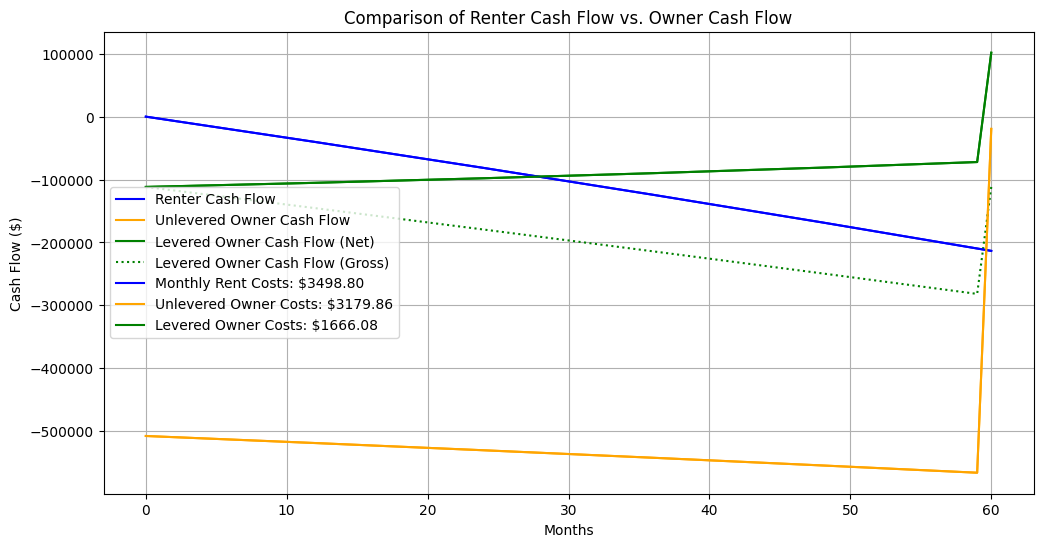

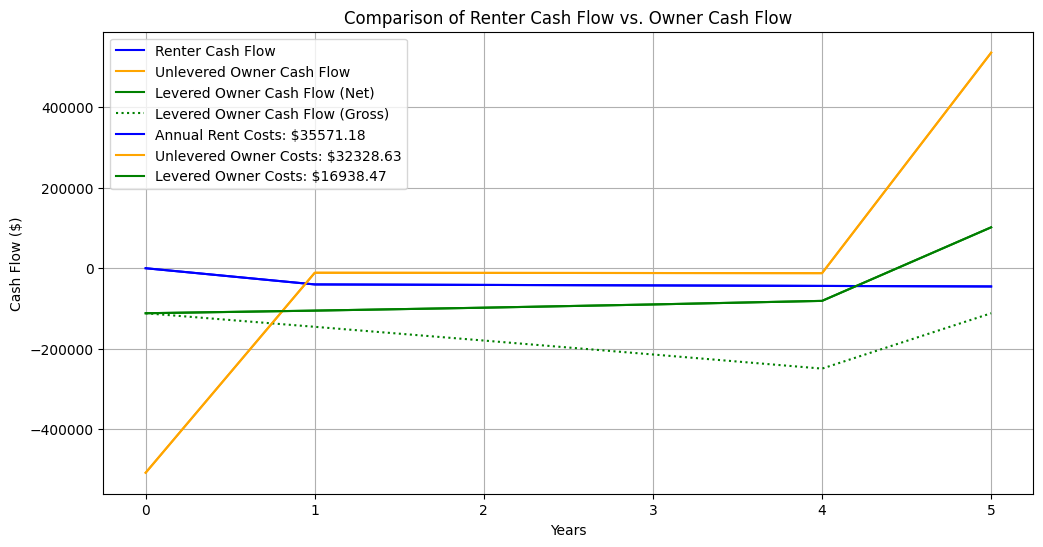

Years                             0              1                 \
Months                           0              1              2    
Rent                            0.0   -3300.000000   -3300.000000   
Renter's Insurance              0.0     -50.000000     -50.000000   
Renter's Cash Flow              0.0   -3350.000000   -3350.000000   
Acquisition               -500000.0       0.000000       0.000000   
Acquisition Costs           -7750.0       0.000000       0.000000   
Sale                            0.0       0.000000       0.000000   
Disposition Costs               0.0       0.000000       0.000000   
Property Tax                    0.0    -250.000000    -250.000000   
Property Tax Shield             0.0      87.500000      87.500000   
Insurance                       0.0    -250.000000    -250.000000   
Maintenance                     0.0    -416.666667    -416.666667   
Condo Dues                      0.0    -104.166667    -104.166667   
Unlevered Owner Cash Flow -507750.0    -933.333333    -933.333333   
Unlevered Net Cash Flow   -507750.0    2416.666667    2416.666667   
Loan Proceeds              400000.0       0.000000       0.000000   
Loan Repayment                  0.0       0.000000       0.000000   
Amortization                    0.0    -352.880117    -354.938584   
Loan Points                 -4000.0       0.000000       0.000000   
Interest                        0.0   -2333.333333   -2331.274867   
Interest Tax Shield             0.0     816.666667     815.946203   
Mortgage Insurance              0.0      -0.000000      -0.000000   
Levered Owner Cash Flow   -111750.0   -2802.880117   -2803.600580   
Levered Net Cash Flow     -111750.0     547.119883     546.399420   
Cum. Gross Equity         -111750.0 -114552.880117 -117356.480697   
Cum. Net Equity           -111750.0 -111202.880117 -110656.480697   

Years                                                                   \
Months                                3              4              5    
Rent                        -3300.000000   -3300.000000   -3300.000000   
Renter's Insurance            -50.000000     -50.000000     -50.000000   
Renter's Cash Flow          -3350.000000   -3350.000000   -3350.000000   
Acquisition                     0.000000       0.000000       0.000000   
Acquisition Costs               0.000000       0.000000       0.000000   
Sale                            0.000000       0.000000       0.000000   
Disposition Costs               0.000000       0.000000       0.000000   
Property Tax                 -250.000000    -250.000000    -250.000000   
Property Tax Shield            87.500000      87.500000      87.500000   
Insurance                    -250.000000    -250.000000    -250.000000   
Maintenance                  -416.666667    -416.666667    -416.666667   
Condo Dues                   -104.166667    -104.166667    -104.166667   
Unlevered Owner Cash Flow    -933.333333    -933.333333    -933.333333   
Unlevered Net Cash Flow      2416.666667    2416.666667    2416.666667   
Loan Proceeds                   0.000000       0.000000       0.000000   
Loan Repayment                  0.000000       0.000000       0.000000   
Amortization                 -357.009067    -359.091625    -361.186317   
Loan Points                     0.000000       0.000000       0.000000   
Interest                    -2329.204383   -2327.121825   -2325.027133   
Interest Tax Shield           815.221534     814.492639     813.759497   
Mortgage Insurance             -0.000000      -0.000000      -0.000000   
Levered Owner Cash Flow     -2804.325250   -2805.054145   -2805.787287   
Levered Net Cash Flow         545.674750     544.945855     544.212713   
Cum. Gross Equity         -120160.805947 -122965.860092 -125771.647379   
Cum. Net Equity           -110110.805947 -109565.860092 -109021.647379   

Years                                                                   \
Months                                6              7         

Years,0,1,2,3,4,5
Months,0,12,24,36,48,60
Rent,0.0,-39600.000000,-40788.000000,-42011.640000,-43272.000000,-44570.160000
Renter's Insurance,0.0,-600.000000,-618.000000,-636.480000,-655.560000,-675.240000
Renter's Cash Flow,0.0,-40200.000000,-41406.000000,-42648.120000,-43927.560000,-45245.400000
Acquisition,-500000.0,0.000000,0.000000,0.000000,0.000000,0.000000
Acquisition Costs,-7750.0,0.000000,0.000000,0.000000,0.000000,0.000000
Sale,0.0,0.000000,0.000000,0.000000,0.000000,579637.037150
Disposition Costs,0.0,0.000000,0.000000,0.000000,0.000000,-31880.037043
Property Tax,0.0,-3000.000000,-3090.000000,-3182.700000,-3278.181000,-3376.526430
Property Tax Shield,0.0,1050.000000,1081.500000,1113.945000,1147.363350,1181.784251


In [33]:
CF = CashFlow(test_query)
CF.__str__("mcf")
CF.__str__("acf")
CF.__plot__("mcf")
CF.__plot__("acf")
display(CF.__df__("mcf",transpose=True))
display(CF.__df__("acf",transpose=True))